In [1]:
import string

import arviz as az
import numpy as np
import pymc as pm

In [2]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [3]:
len(string.ascii_uppercase)

26

In [4]:
rng = np.random.default_rng(sum(map(ord, "predict on new groups")))

In [5]:
N_s = [100, 80, 40, 20, 10, 5, 5, 3] * 3
J = len(N_s)
N = sum(N_s)
mu_true = rng.normal(size=J, scale=4)
sigma_true = 0.75
print(mu_true)
print(mu_true.mean())

[-0.42641507 -1.441522    1.65635131  0.61672771  4.79917902  3.77879226
 -0.57931566  2.63801853 -3.03038416  0.89426018  3.12997201  3.74443187
  8.64761155  3.53323517  2.79857719  0.94125151 -7.50526927 -4.1215966
 -0.35109168  4.34350605 -1.75370249 -9.22580792  1.85267288  1.7727786 ]
0.6963442065606625


In [6]:
J

24

In [7]:
group_idx = np.repeat(np.arange(J), N_s)
group_idx

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3

In [8]:
np.unique(group_idx, return_counts=True)[1]

array([100,  80,  40,  20,  10,   5,   5,   3, 100,  80,  40,  20,  10,
         5,   5,   3, 100,  80,  40,  20,  10,   5,   5,   3])

In [9]:
y = rng.normal(loc=mu_true[group_idx], scale=sigma_true)
y

array([ 0.38857694,  0.0504576 , -0.9887105 , -0.10469356, -1.45482784,
        0.08020649, -1.71437311, -1.35389676,  0.62383329,  0.38302463,
       -0.99320431,  0.24849015, -1.11689673, -0.96752131, -0.92143586,
        1.56776838, -0.08747254, -0.04263088,  0.60651092, -0.61669117,
       -0.14549954,  0.97036396,  0.25881444, -0.23075498, -0.11637909,
       -1.70994976, -0.54592725, -0.19240129, -0.51164354, -1.02989895,
       -1.44138065, -0.68876158, -1.45894217,  0.86142657, -0.56529672,
        0.06655482, -1.10562413,  0.35111867, -0.76575   , -0.77464087,
       -0.8780146 , -0.21561727, -0.49126468, -1.21591262, -0.19091784,
       -1.07678657,  0.08170202,  1.27708453, -0.2081839 ,  0.85347499,
       -1.48414921, -0.84446459, -0.46724784,  0.05171991, -1.58327049,
       -0.58128082, -0.81052371,  0.15260563, -0.7946543 , -1.04262391,
        0.55090833, -0.44575817, -0.07982837,  0.14175978, -0.17477054,
        0.9337418 , -0.15662183,  1.3733343 , -1.43369512, -0.03

## Observed groups, no partial pooling

Only these groups can exist in the entire universe

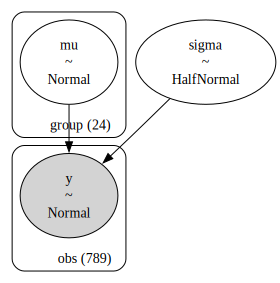

In [10]:
coords = {
    "group": string.ascii_uppercase[:J],
    "obs": np.arange(N)
}

with pm.Model(coords=coords) as model:
    mu = pm.Normal("mu", mu=0, sigma=5, dims="group")
    sigma = pm.HalfNormal("sigma")
    pm.Normal("y", mu=mu[group_idx], sigma=sigma, observed=y, dims="obs")

model.to_graphviz()

In [11]:
with model:
    idata = pm.sample(random_seed=1)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


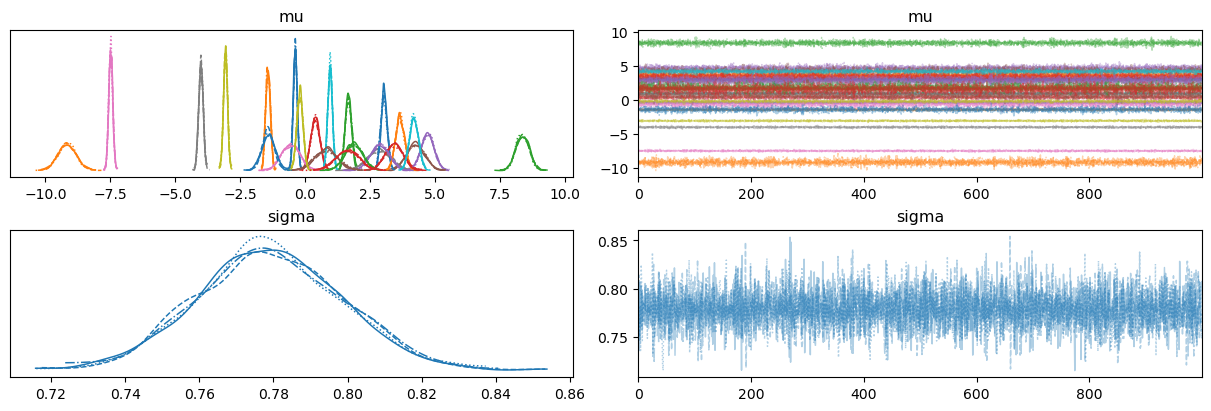

In [12]:
az.plot_trace(idata, backend_kwargs={"layout": "constrained"});

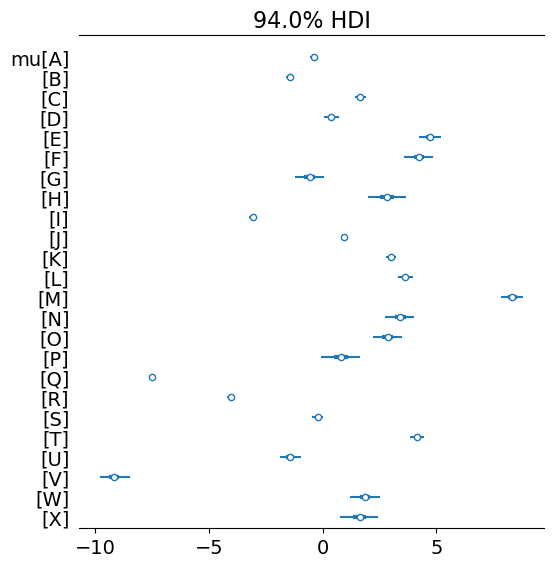

In [13]:
az.plot_forest(idata, var_names="mu", combined=True);

## Observed groups, partial pooling

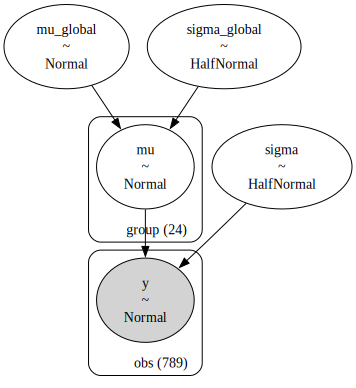

In [14]:
coords = {
    "group": string.ascii_uppercase[:J],
    "obs": np.arange(N)
}

with pm.Model(coords=coords) as model_2:
    mu_global = pm.Normal("mu_global", sigma=5)
    sigma_global = pm.HalfNormal("sigma_global", sigma=0.25)

    mu = pm.Normal("mu", mu=mu_global, sigma=sigma_global, dims="group")

    sigma = pm.HalfNormal("sigma")
    pm.Normal("y", mu=mu[group_idx], sigma=sigma, observed=y, dims=("obs",))

model_2.to_graphviz()

In [15]:
with model_2:
    idata_2 = pm.sample(random_seed=1)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_global, sigma_global, mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


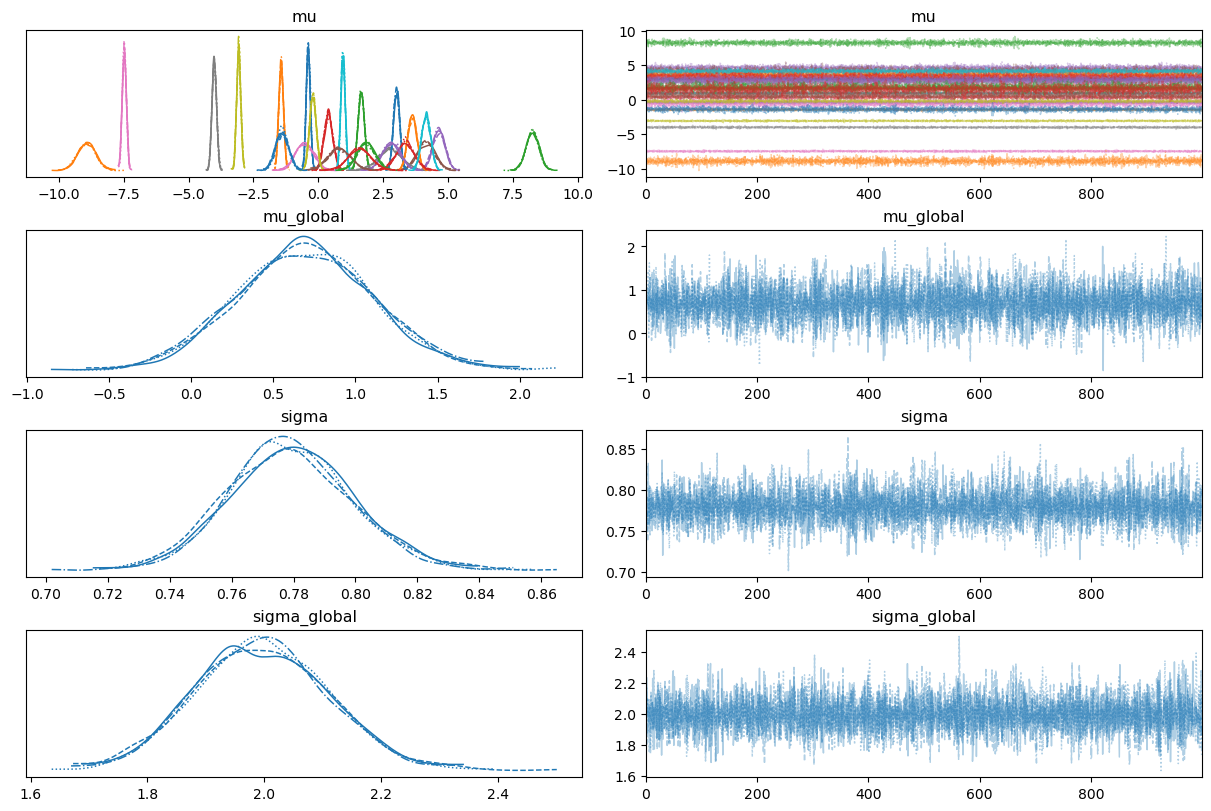

In [16]:
az.plot_trace(idata_2, backend_kwargs={"layout": "constrained"});

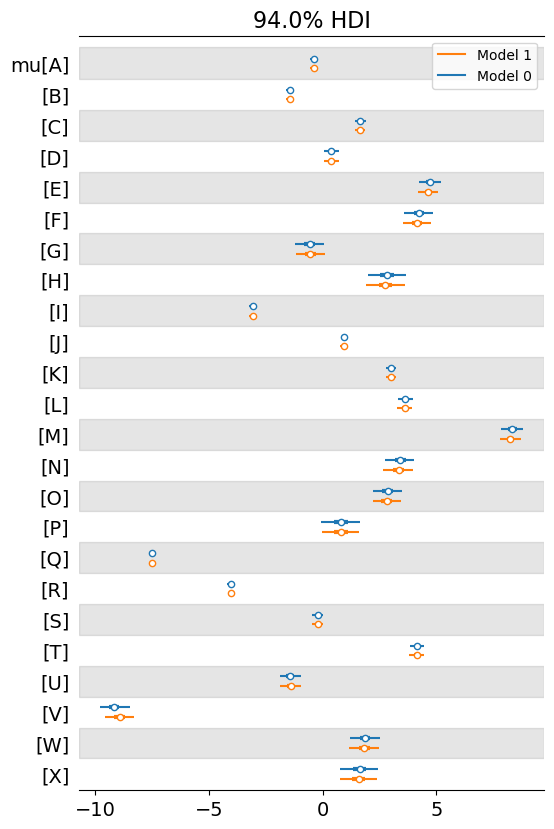

In [17]:
az.plot_forest([idata, idata_2], var_names="mu", combined=True);

In [37]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[A],-0.403,0.082,-0.561,-0.252,0.001,0.001,4893.0,3185.0,1.0
mu[B],-1.319,0.091,-1.491,-1.153,0.001,0.001,5485.0,3055.0,1.0
mu[C],1.440,0.130,1.187,1.682,0.002,0.001,5523.0,2877.0,1.0
mu[D],0.676,0.190,0.345,1.050,0.003,0.002,5711.0,2958.0,1.0
mu[E],4.432,0.263,3.929,4.927,0.004,0.003,5291.0,2812.0,1.0
mu[F],3.848,0.373,3.135,4.519,0.005,0.003,5891.0,3120.0,1.0
mu[G],-0.852,0.370,-1.545,-0.140,0.005,0.004,5504.0,3209.0,1.0
mu[H],2.949,0.470,2.078,3.817,0.006,0.004,5883.0,3334.0,1.0
mu[I],-3.241,0.577,-4.285,-2.141,0.007,0.005,6007.0,3223.0,1.0
sigma,0.835,0.037,0.771,0.910,0.001,0.000,4522.0,3005.0,1.0


In [38]:
az.summary(idata_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[A],-0.402,0.084,-0.555,-0.240,0.001,0.001,7639.0,3065.0,1.0
mu[B],-1.317,0.092,-1.486,-1.141,0.001,0.001,6364.0,3160.0,1.0
mu[C],1.436,0.131,1.192,1.690,0.002,0.001,7135.0,2776.0,1.0
mu[D],0.685,0.187,0.342,1.033,0.002,0.002,7291.0,3308.0,1.0
mu[E],4.404,0.263,3.919,4.891,0.003,0.002,6504.0,3143.0,1.0
mu[F],3.808,0.374,3.085,4.476,0.005,0.003,6862.0,3076.0,1.0
mu[G],-0.816,0.376,-1.529,-0.129,0.005,0.004,5900.0,2993.0,1.0
mu[H],2.896,0.481,1.953,3.756,0.006,0.004,7093.0,3147.0,1.0
mu[I],-3.078,0.582,-4.228,-2.027,0.007,0.005,6577.0,3272.0,1.0
mu_global,0.812,0.962,-1.003,2.678,0.014,0.012,4856.0,2704.0,1.0


## Oh, there's a new group

There exists another group, we know it's one, but we have not seen any data for it

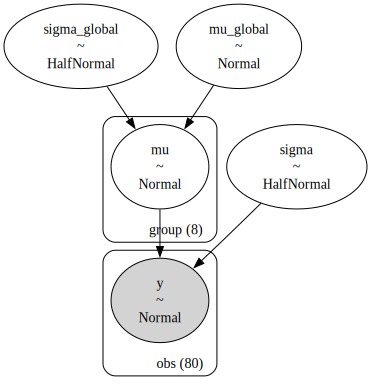

In [23]:
coords = {
    "group": string.ascii_uppercase[:(J + 1)],
    "obs": np.arange(N)
}

with pm.Model(coords=coords) as model_3:
    mu_global = pm.Normal("mu_global", sigma=0.1)
    sigma_global = pm.HalfNormal("sigma_global", sigma=0.1)

    mu = pm.Normal("mu", mu=mu_global, sigma=sigma_global, dims="group")

    sigma = pm.HalfNormal("sigma")
    pm.Normal("y", mu=mu[group_idx], sigma=sigma, observed=y, dims=("obs",))

model_3.to_graphviz()

In [24]:
with model_3:
    idata_3 = pm.sample(random_seed=1)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_global, sigma_global, mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


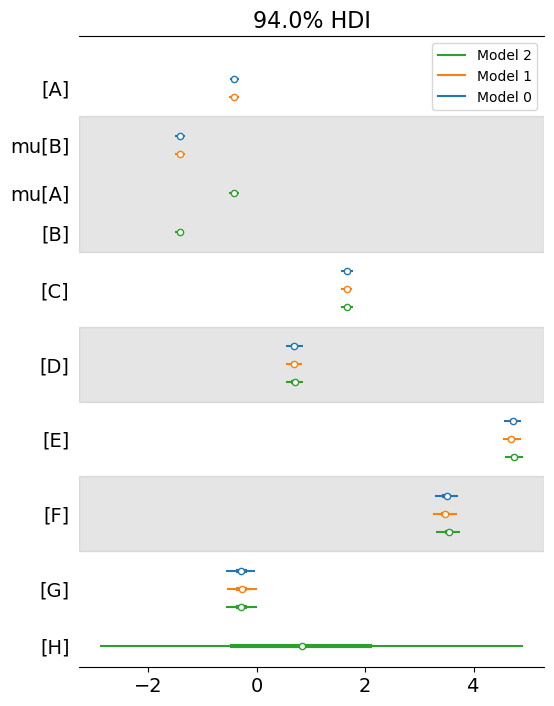

In [92]:
az.plot_forest([idata, idata_2, idata_3], var_names="mu", combined=True);

is the posterior of mu[G] equal to its prior?

<Axes: >

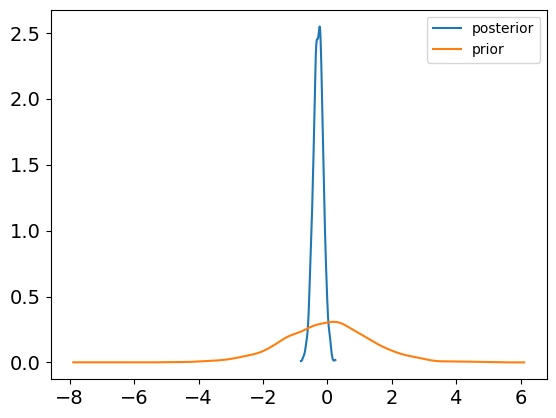

In [93]:
ax = az.plot_kde(idata_3.posterior["mu"].sel(group="G").to_numpy().flatten(), plot_kwargs={"color": "C0"}, label="posterior")
az.plot_kde(pm.draw(mu[-1], 4000), ax=ax, plot_kwargs={"color": "C1"},  label="prior")

compare to sampling from different groups

## Oh, there are two new groups

There are two other groups, we know it's two, just those two, believe me

## Wait! how many groups can we have?

https://discourse.pymc.io/t/out-of-sample-prediction-with-new-category/9744/2?u=tcapretto

https://discourse.pymc.io/t/out-of-sample-prediction-with-new-category/9744/5?u=tcapretto

https://discourse.pymc.io/t/difference-between-unpooled-model-and-partial-pooling/14900/4

https://khakieconomics.github.io/2016/11/09/Random-effects,-partial-pooling,-and-exchangability.html

https://www.tjmahr.com/plotting-partial-pooling-in-mixed-effects-models/